# File to start checking if small component are capable of reproducing the big dataset

In [1]:
import pandas as pd
import sys
import seaborn as sns
import os


from HelperClasses.LoadData import LoadICARuns 
from HelperClasses.Correlation import Correlation  
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from tqdm import tqdm

# Find lineair combinations

In [2]:
datasets = LoadICARuns('/home/MarkF/DivideConquer/Results/2000_Samples_Experiment/Clustered_vs_Random_Experiment/'
                       'Clustered_Splits/3_Split',
                        '/home/MarkF/DivideConquer/Results/2000_Samples_Experiment/Clustered_vs_Random_Experiment/'
                        'ICARUN_ALL/ica_independent_components_consensus.tsv')

Number of components split 3: 150
Number of components split 1: 196
Number of components split 2: 139
Number of components All data: 171


In [3]:
# Look how good a linear regressor is in predicting the new component
X = datasets.get_merged_small().values
new_cor = []
for column in tqdm(datasets.get_sample_data().columns):
    # Get y
    y = datasets.get_sample_data()[column]
    # Fit it without a intersept
    reg = LinearRegression(fit_intercept=False).fit(X, y)
    # Get the high coeficients
    high_cov = reg.coef_.argsort()[::-1]
    # Predict it back with only three components
    y_pred = reg.coef_[high_cov[0]] * X[:,high_cov[0]] + reg.coef_[high_cov[1]] * X[:,high_cov[1]] + reg.coef_[high_cov[2]] * X[:,high_cov[2]]
    #y_pred = reg.predict(X)
    # Get the new correlation
    new_cor.append(abs(pearsonr(y, y_pred)[0]))

100%|██████████| 171/171 [00:32<00:00,  5.23it/s]


<AxesSubplot:xlabel='Pearson correlation', ylabel='Group'>

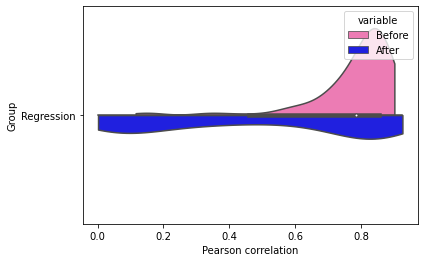

In [4]:
# make a violineplot of the two distributions
correlation = Correlation(datasets.get_merged_small(), datasets.get_sample_data())
plot_df = pd.DataFrame(correlation.get_half_correlation().max(axis=1))
plot_df[1] = new_cor
plot_df.columns = ['Before', 'After']
plot_df = pd.melt(plot_df, value_name='Pearson correlation')
plot_df['Group'] = 'Regression'
sns.violinplot(data=plot_df, x='Pearson correlation', y='Group',hue='variable', palette=['hotpink', 'blue'],
               split=True, cut=0)

Other methods need to be further investiaged because this one is not good